In [5]:
using ITensors, ITensorMPS
using LinearAlgebra
# using SparseArrays
using Plots
using JLD2

In [6]:
using ITensorCorrelators

In [7]:
include("../src/main.jl")
include("../src/observables.jl")
include("../src/states.jl")
include("../src/doubled_measurements.jl")
include("../src/singled_measurements.jl")
include("../src/circuits.jl")

pure_sample (generic function with 1 method)

In [ ]:
# jldsave("05_10_05_data2.jld2"; data, data2, data3, data4)

In [19]:
function sitequads(L)
    return [(i, j, k, l) for i in 1:L for j in i+1:L for k in j+1:L for l in k+1:L]
end

sitequads (generic function with 1 method)

In [29]:
length(sitequads(8))

70

In [76]:
binder_EA(ψ; ref=false)

0.18186481245904518 + 0.0im

In [77]:
pure_κEA(ψ; ref=false)

1.0452147515170527

In [81]:
1-(42.90198336337159 / L^2)/(3*1.0452147515170527^2)

0.18186481245904684

In [79]:
L = 4
quads = [(i,j,k,l) for i in 1:L for j in 1:L for k in 1:L for l in 1:L]
corrs = correlator(ψ, ("Z", "Z", "Z", "Z"), quads)
sum([corrs[(i,j,k,l)]^2 for (i,j,k,l) in quads])


42.90198336337163 + 0.0im

In [80]:
L = 4
kapp = pure_κEA(ψ; ref=false)
quads = [(i, j, k, l) for i in 1:L for j in i+1:L for k in j+1:L for l in k+1:L]
ZZZZs = correlator(ψ, ("Z", "Z", "Z", "Z"), quads)
3L^2-2L + L*(12L-16)*(kapp-1)/2 + factorial(4) * sum([ZZZZs[(i,j,k,l)]^2 for (i,j,k,l) in quads])


42.90198336337165 - 0.0im

In [45]:
3pure_κEA(ψ; ref=false)^2

9.872821240461162

In [63]:
ψ, _ = pure_circuit(4, 12, 0.5, 0.7, 0.0, 0.0; PBC=false, ref=false, final_perfect=false)

(MPS
[1] ((dim=2|id=958|"Qubit,Site,n=1"), (dim=2|id=691|"Link,l=1"))
[2] ((dim=2|id=380|"Qubit,Site,n=2"), (dim=4|id=804|"Link,l=2"), (dim=2|id=691|"Link,l=1"))
[3] ((dim=2|id=83|"Qubit,Site,n=3"), (dim=2|id=839|"Link,l=3"), (dim=4|id=804|"Link,l=2"))
[4] ((dim=2|id=920|"Qubit,Site,n=4"), (dim=2|id=839|"Link,l=3"))
, Dict{Symbol, Vector{ComplexF64}}())

In [4]:
data = Dict{Tuple{Int,Int,Float64,Float64},NTuple{2,Dict{Symbol,Vector{ComplexF64}}}}()

Dict{Tuple{Int64, Int64, Float64, Float64}, Tuple{Dict{Symbol, Vector{ComplexF64}}, Dict{Symbol, Vector{ComplexF64}}}}()

In [37]:
observables = [:four_point_EA, :pure_κEA]
L = 8
T = 2L
δ = 1.0
q = 0.0
θ = 0.0
samples = 100

λ = 0.5
means, vars = pure_sample(L, T, λ, δ, θ, θ, samples; PBC=false, ref=false, final_perfect=false, observables=observables)
data[(L,T,λ,δ)] = (means,vars)


(Dict{Symbol, Vector{ComplexF64}}(:pure_κEA => [8.0 + 0.0im, 8.0 + 0.0im, 8.000000000000002 + 0.0im, 1.935979905489808 + 0.0im, 4.410280496564145 + 0.0im, 1.6101444811867014 + 0.0im, 4.086296913682448 + 0.0im, 1.5089022101486989 + 0.0im, 3.984538238018615 + 0.0im, 1.5712994836239793 + 0.0im  …  3.9661395971352515 + 0.0im, 1.5576333566831875 + 0.0im, 3.981121907330601 + 0.0im, 1.5109911898488526 + 0.0im, 3.9343123831049525 + 0.0im, 1.5088829195892766 + 0.0im, 3.8955978127311055 + 0.0im, 1.5220580496573606 + 0.0im, 3.8439949135779847 + 0.0im, 1.4998607849479024 + 0.0im], :four_point_EA => [63.99999999999999 + 0.0im, 63.99999999999999 + 0.0im, 64.0 + 0.0im, 7.884785761517083 + 0.0im, 28.953303159508245 + 0.0im, 6.040318810453673 + 0.0im, 26.616919659528385 + 0.0im, 5.502377476479795 + 0.0im, 25.5864284885453 + 0.0im, 5.859238476895275 + 0.0im  …  25.557612447563248 + 0.0im, 5.767470269489925 + 0.0im, 25.746505901935706 + 0.0im, 5.5301686825703795 + 0.0im, 25.320458203763778 + 0.0im, 5.485

In [23]:
x2 = data[(8,16,0.5,1.0)][1][:pure_κEA]
x4 = data[(8,16,0.5,1.0)][1][:four_point_EA]

1-(x4[end-1] / (3*x2[end-1]^2))

0.5346162978499653 - 0.0im

In [41]:
data[(8,16,0.5,1.0)][1][:pure_κEA][end-2]/L

0.19025725620717007 + 0.0im

In [42]:
data[(8,16,0.5,1.0)][1][:four_point_EA][end-2]/L^2

0.08693885409705705 + 0.0im

34-element Vector{ComplexF64}:
  63.99999999999999 + 0.0im
  63.99999999999999 + 0.0im
               64.0 + 0.0im
   8.16768254176632 + 0.0im
  34.91089788944757 + 0.0im
 6.2504305547633585 + 0.0im
 33.008473040941446 + 0.0im
  6.100528708434934 + 0.0im
  33.56523111545067 + 0.0im
  5.964232608529004 + 0.0im
                    ⋮
  6.602637743513369 + 0.0im
   34.2460948783001 + 0.0im
  6.493221668669966 + 0.0im
  31.03078802814239 + 0.0im
  6.286037969867336 + 0.0im
 30.372476695176015 + 0.0im
  6.022533732076779 + 0.0im
   34.9126814589499 + 0.0im
  6.250660409153072 + 0.0im

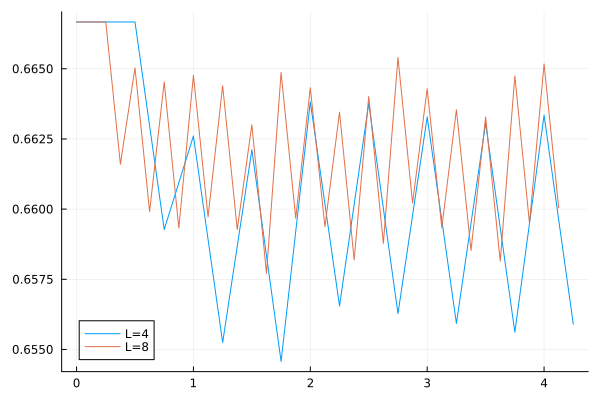

In [158]:
λ = 0.1

plt = plot()
for L in [4, 8]
    xs = collect(0:4L+1)
    ys = 1 .- real.(data4[(L,2L,λ,0.7)][1][:four_point_EA][1:1:end]) ./ (3real.(data4[(L,2L,λ,0.7)][1][:pure_κEA][1:1:end] .^ 2))
    plt = plot!(plt, xs/L, ys, label="L=$L")
end
plt

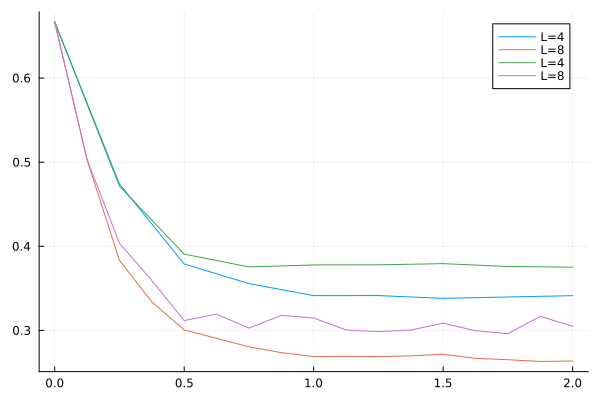

In [154]:
plt = plot()
for L in [4, 8]
    xs = collect(0:2L)
    ys = 1 .- real.(data2[(L,2L,0.5,0.7)][1][:four_point_EA][2:2:end]) ./ (3real.(data2[(L,2L,0.5,0.7)][1][:pure_κEA][2:2:end] .^ 2))
    plt = plot!(plt, xs/L, ys, label="L=$L")
end
for L in [4, 8]
    xs = collect(0:2L)
    ys = 1 .- real.(data4[(L,2L,0.5,0.7)][1][:four_point_EA][2:2:end]) ./ (3real.(data4[(L,2L,0.5,0.7)][1][:pure_κEA][2:2:end] .^ 2))
    plt = plot!(plt, xs/L, ys, label="L=$L")
end
plt

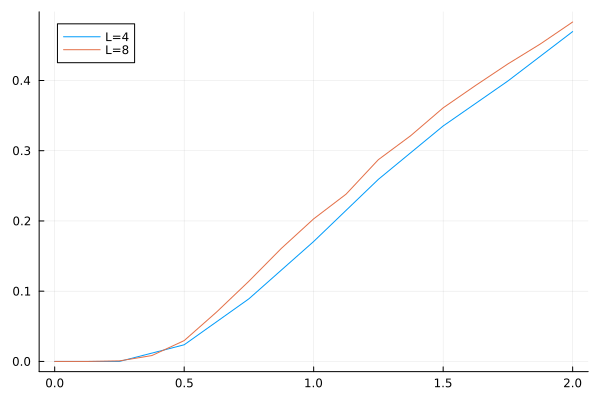

In [139]:
plt = plot()
for L in [4,8]
    xs = collect(0:2L)
    ys = 1 .- real.(data3[(L,2L,0.5,0.7)][1][:pure_SR][1:2:end])
    plt = plot!(plt, xs/L, ys, label="L=$L")
end
plt

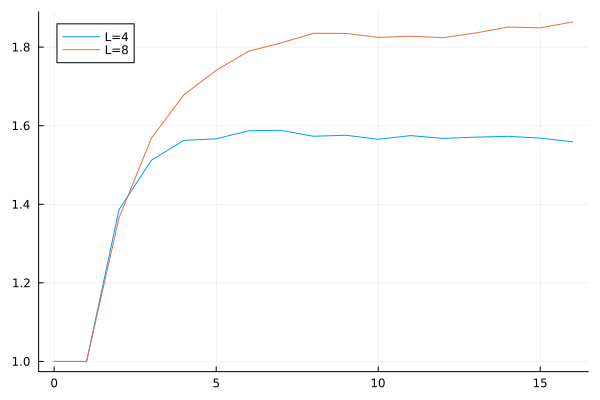

In [133]:
plt = plot()
for L in [4,8]
    T = 16
    xs = collect(0:T)
    ys = real.(data2[(L,T,0.5,0.7)][1][:four_point_EA][1:2:end]) ./ real.(data2[(L,T,0.5,0.7)][1][:pure_κEA][1:2:end] .^ 2)
    plt = plot!(plt, xs, ys, label="L=$L")
end
# for L in [4,8]
#     xs = collect(0:2L)
#     ys = real.(data2[(L,2L,0.5,0.7)][1][:pure_κEA][1:2:end] .^ 2)
#     plt = plot!(plt, xs, ys, label="L=$L")
# end

plt

In [91]:
means[:binder_EA]

26-element Vector{ComplexF64}:
  0.6666666666666659 + 0.0im
  0.6666666666666659 + 0.0im
   0.666666666666666 + 0.0im
 0.47805525032806245 + 0.0im
     0.5310083406489 + 0.0im
  0.3540340945461526 + 0.0im
  0.4425482638421293 + 0.0im
    0.30994122810001 + 0.0im
   0.431358472252706 + 0.0im
 0.31574400917938056 + 0.0im
                     ⋮
  0.2865545752989637 + 0.0im
  0.4006107715017188 + 0.0im
 0.28695365517898624 + 0.0im
 0.41676369907709854 + 0.0im
  0.2753588594972829 + 0.0im
 0.39994763374551634 + 0.0im
 0.28848466411947465 + 0.0im
   0.414755749477157 + 0.0im
  0.2904607137784338 + 0.0im

In [92]:
means[:binder_EA]

26-element Vector{ComplexF64}:
  0.6666666666666659 + 0.0im
  0.6666666666666659 + 0.0im
   0.666666666666666 + 0.0im
 0.47805525032806245 + 0.0im
     0.5310083406489 + 0.0im
  0.3540340945461526 + 0.0im
  0.4425482638421293 + 0.0im
    0.30994122810001 + 0.0im
   0.431358472252706 + 0.0im
 0.31574400917938056 + 0.0im
                     ⋮
  0.2865545752989637 + 0.0im
  0.4006107715017188 + 0.0im
 0.28695365517898624 + 0.0im
 0.41676369907709854 + 0.0im
  0.2753588594972829 + 0.0im
 0.39994763374551634 + 0.0im
 0.28848466411947465 + 0.0im
   0.414755749477157 + 0.0im
  0.2904607137784338 + 0.0im

In [12]:
means[:pure_SR]

26-element Vector{ComplexF64}:
                 1.0 + 0.0im
                 1.0 + 0.0im
                 1.0 + 0.0im
  0.6839734789464608 + 0.0im
  0.7926117097076215 + 0.0im
   0.534223739891995 + 0.0im
  0.6958308260637671 + 0.0im
 0.43239886101568026 + 0.0im
  0.6281535242267442 + 0.0im
  0.4431724258758567 + 0.0im
                     ⋮
  0.4893755038551862 + 0.0im
  0.7018947044782772 + 0.0im
  0.4354434477313902 + 0.0im
     0.6655559977081 + 0.0im
 0.45718620975631685 + 0.0im
  0.6613243908764042 + 0.0im
 0.44145137275065105 + 0.0im
  0.6873612937245082 + 0.0im
 0.43018837564085965 + 0.0im